Lista 2

Dystrybunata rozkładu wykładczniego ma postać:
$$ F(x) = 1 - e^{-\lambda x}$$
Szukamy $F^{-1}(U)$

\begin{equation}
\begin{split}

F(x) &= U \\
1 - e^{-\lambda x} &= U \\
e^{-\lambda x} &= 1 - U \\
-\lambda x &= \ln({1-U}) \\
x &= \frac{-1}{\lambda} ln({1-U})

\end{split}
\end{equation} 
A zatem możemy zapisać dystrybuantę odwrotną jako $$ F^{-1}(U) = \frac{-1}{\lambda} ln({1-U})$$

In [1]:
import numpy as np
def exp_simulation(num, lambda_):
    sample = np.random.rand(num)
    return (-1)/lambda_ * np.log(1-sample)

In [9]:
def exp_pdf(xs,lambda_):
    return lambda_ * np.exp((-1)*lambda_*xs)

In [24]:
def exp_cdf(xs, lambda_):
    return (1 - np.exp((-1)*lambda_*xs))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon

n = 1000
lambda_ = 2
sample = exp_simulation(n, lambda_)


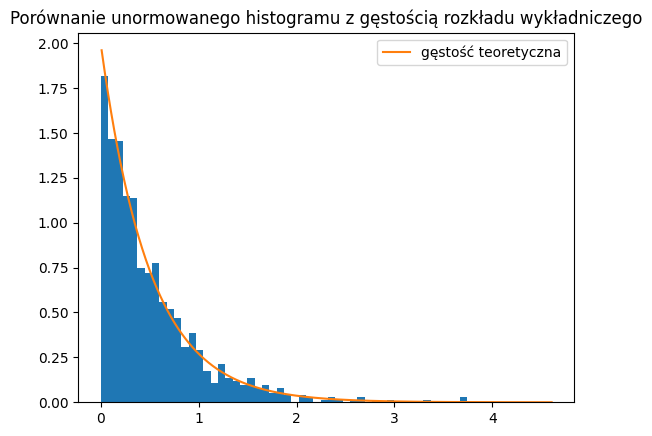

In [22]:
xs = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 1000)

plt.hist(sample, density=True, bins=50)
plt.plot(xs, exp_pdf(xs, lambda_), label="gęstość teoretyczna")
plt.title("Porównanie unormowanego histogramu z gęstością rozkładu wykładniczego")
plt.legend(loc='best')
plt.show()

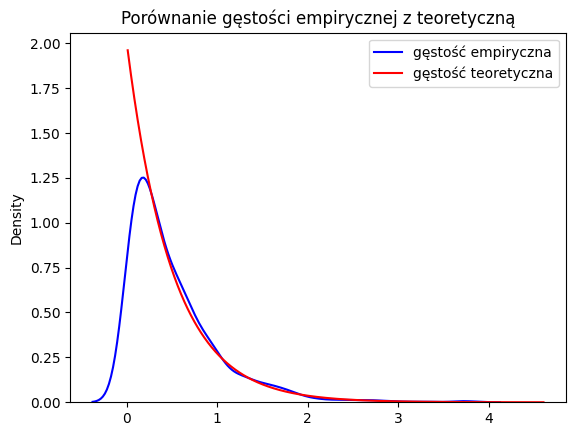

In [23]:
sns.kdeplot(sample, label="gęstość empiryczna", color="blue")
plt.plot(xs, exp_pdf(xs, lambda_), label="gęstość teoretyczna", color="red")
plt.title("Porównanie gęstości empirycznej z teoretyczną")
plt.legend(loc="best")
plt.show()

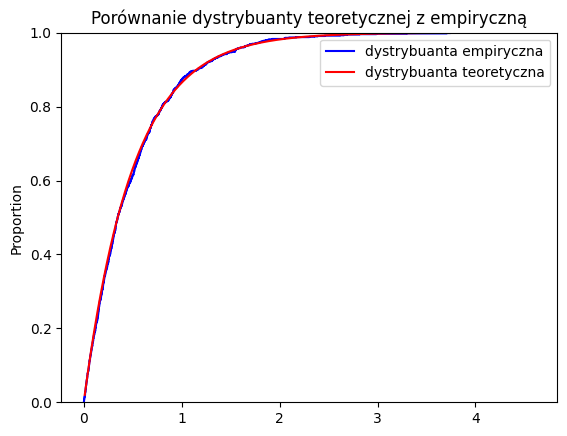

In [25]:
sns.ecdfplot(data=sample, label="dystrybuanta empiryczna", color="blue")
plt.plot(xs, exp_cdf(xs, 2), label='dystrybuanta teoretyczna', color="red")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty teoretycznej z empiryczną")
plt.show()

Rozkład normalny

In [2]:
from scipy.stats import norm
def normal_simulation(num, mi, sigma_s):
    sample = np.random.rand(num)
    return norm.ppf(sample, loc = mi, scale = sigma_s**(0.5))
    

In [44]:
mi = 0
sigma_s = 1
sample2 = normal_simulation(n, mi, sigma_s)

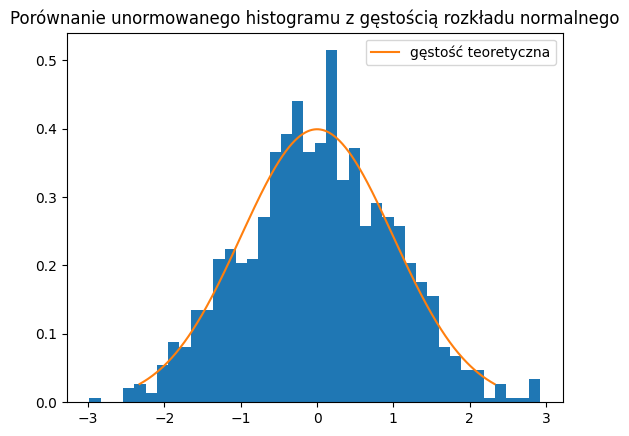

In [45]:
xs2 = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 1000)
plt.hist(sample2, density=True, bins=40)
plt.plot(xs2, norm.pdf(xs2, loc = mi, scale = sigma_s), label="gęstość teoretyczna")
plt.title("Porównanie unormowanego histogramu z gęstością rozkładu normalnego")
plt.legend(loc='best')
plt.show()

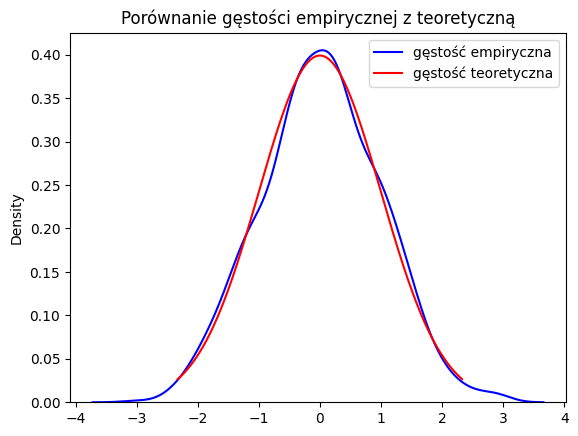

In [46]:
sns.kdeplot(sample2, label="gęstość empiryczna", color="blue")
plt.plot(xs2, norm.pdf(xs2, loc=0, scale=1), label="gęstość teoretyczna", color="red")
plt.title("Porównanie gęstości empirycznej z teoretyczną")
plt.legend(loc="best")
plt.show()

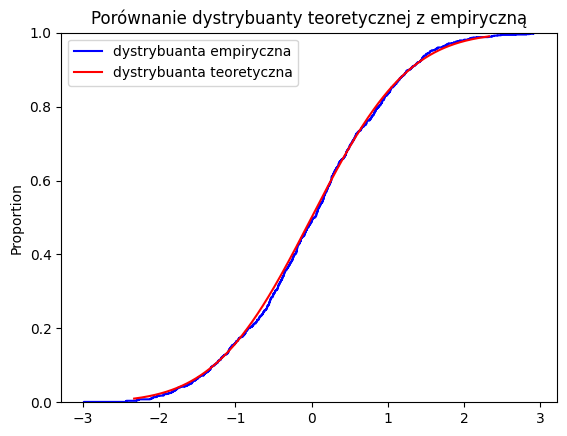

In [47]:
sns.ecdfplot(data=sample2, label="dystrybuanta empiryczna", color="blue")
plt.plot(xs2, norm.cdf(xs2, loc=0, scale=1), label='dystrybuanta teoretyczna', color="red")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty teoretycznej z empiryczną")
plt.show()

Rozkład Cauchy'ego

Zmienna losowa o rozkładzie Cauchy'ego z parametrami $\mu$ i $\gamma$ ma dystrybuantę postaci
$$
F(x) = \frac{1}{\pi}\arctan\left(\frac{x-\mu}{\gamma}\right) + \frac{1}{2}
$$
Szukamy $F^{-1}(U)$

\begin{equation}
\begin{split}

F(x) &= U \\
\frac{1}{\pi}\arctan\left(\frac{x-\mu}{\gamma}\right) + \frac{1}{2} &= U \\
\arctan\left(\frac{x-\mu}{\gamma}\right) &= \pi\left(U - \frac{1}{2}\right) \\
\frac{x-\mu}{\gamma} &= \tan\left[\pi\left(U - \frac{1}{2}\right)\right] \\
x &= \mu + \gamma \tan\left[\pi\left(U - \frac{1}{2}\right)\right]\\


\end{split}
\end{equation} 

In [68]:
from scipy.stats import cauchy
def cauchy_simulation(num, mi, gamma):
    sample = np.random.rand(num)
    return (mi + gamma*np.tan(np.pi*sample - np.pi/2))

In [50]:
def cauchy_pdf(x, mi, gamma):
    return (gamma/ (np.pi*gamma**2 + np.pi*(x-mi)**2))

In [51]:
def cauchy_cdf(x, mi, gamma):
    return (1/np.pi * np.arctan((x-mi)/gamma) + 1/2)

In [72]:
mi2 = 0
gamma = 1
sample3 = cauchy_simulation(n, mi2, gamma)

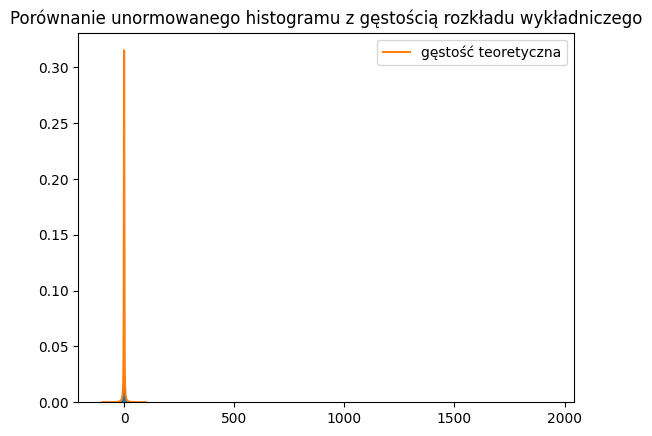

In [88]:
xs3 = np.linspace(-100, 100, 1000)

plt.hist(sample3, density=True, bins=1000)
plt.plot(xs3, cauchy_pdf(xs3, mi2, gamma), label="gęstość teoretyczna")
plt.title("Porównanie unormowanego histogramu z gęstością rozkładu wykładniczego")
plt.legend(loc='best')
plt.show()

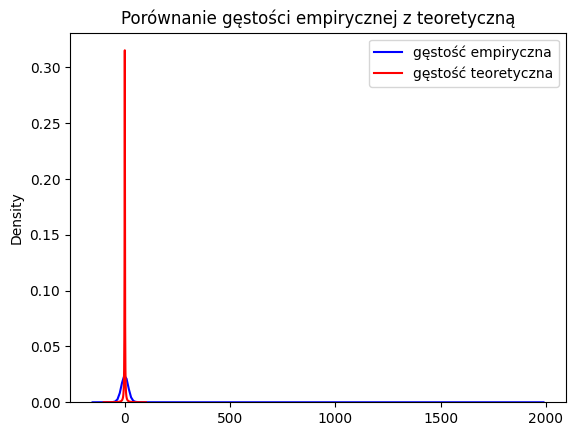

In [89]:
sns.kdeplot(sample3, label="gęstość empiryczna", color="blue")
plt.plot(xs3, cauchy_pdf(xs3, mi2, gamma), label="gęstość teoretyczna", color="red")
plt.title("Porównanie gęstości empirycznej z teoretyczną")
plt.legend(loc="best")
plt.show()

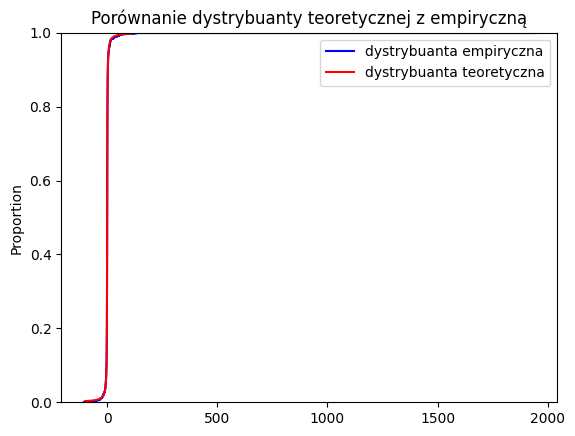

In [90]:
sns.ecdfplot(data=sample3, label="dystrybuanta empiryczna", color="blue")
plt.plot(xs3, cauchy_cdf(xs3, mi2, gamma), label='dystrybuanta teoretyczna', color="red")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty teoretycznej z empiryczną")
plt.show()

Rozkład geometryczny

In [91]:
from scipy.stats import geom
def geom_simulation(num,p):
    sample = np.random.rand(num)
    return (np.ceil(np.log(sample)/np.log(1-p)))

In [100]:
p = 1
sample4 = geom_simulation(n, 1/2)

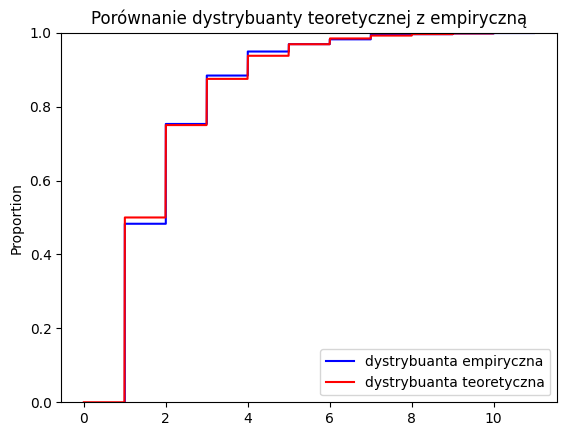

In [104]:
xs4 = np.linspace(0, 10, 1000)
sns.ecdfplot(data=sample4, label="dystrybuanta empiryczna", color="blue")
plt.plot(xs4, geom.cdf(xs4, 1/2), label='dystrybuanta teoretyczna', color="red")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty teoretycznej z empiryczną")
plt.show()

Rozkład Poissona

In [105]:
def pois_simulation(n, lambd):
    sample = np.random.rand(n)
    result = []
    for u in sample:
        j = 0
        p = np.exp(-lambd)
        F = p
        while u > F:
            p *= lambd/(j+1)
            F += p
            j += 1
        result.append(j)
    return result

In [109]:
lambd = 2
sample5 = pois_simulation(n, lambd)

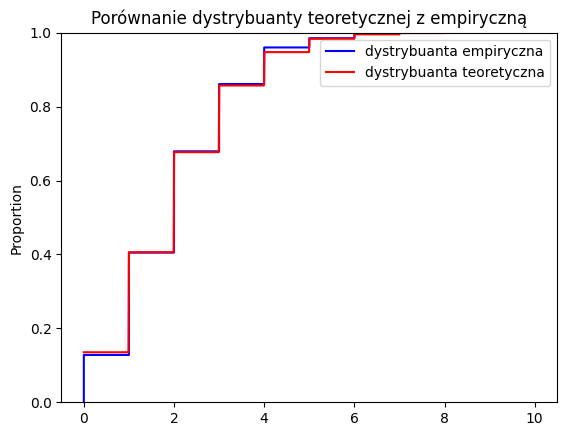

In [110]:
from scipy.stats import poisson
xs5 = np.linspace(0, 10, 1000)
sns.ecdfplot(data=sample5, label="dystrybuanta empiryczna", color="blue")
plt.plot(xs5, poisson.cdf(xs5,lambd), label='dystrybuanta teoretyczna', color="red")
plt.legend(loc="best")
plt.title("Porównanie dystrybuanty teoretycznej z empiryczną")
plt.show()